# **Examen final de Desarrollo de Aplicaciones para la Visualización de Datos**

Nombre: DANIEL

Apellidos: LOSADA RUEDA

Tiempo: *2 horas y 30 minutos*

## **Contexto del ejercicio**

Un banco portugues desea entender en más detalle las campañas de marketing directo que ha realizado en los últimos meses a más de 40 mil clientes. Las campañas de marketing se basaron en llamadas telefónicas. Muchas veces era necesario más de un contacto con un mismo cliente, para saber si el producto (depósito bancario) sería ('sí') o no ('no') contratado.

El objetivo del análisis es buscar patrones para entender mejor que tipo de perfil tienen los clientes que han contratado el depósito para buscar en su base de datos otros clientes parecidos para aumentar la respuesta y el ROI de futuras campañas de marketing directo intentando vender el mismo depósito. Por lo tanto, se pide:

1.  Realizar un análisis descriptivo de los datos con al menos, 6 visualizaciones diferentes. (3 Puntos) (*)

2.  Montar un dashboard con al menos, 4 visualizaciones diferentes, que incluyan 2 componentes interactivas y 1 callback (5 Puntos) (*)

3. Concluir todo este análisis haciendo recomendaciones para la mejora de futuras campañas de contacto directo a partir de los resultados obtenidos de los análisis realizados con los datos. (2 Puntos)

Para realizar este análisis se provee de un juego de datos con las siguientes variables:

- age	- Edad (numérica)
- job - Ocupación (categórica)
- marital - Estado civil (categórica)
- education - Nivel educativo (categórica)
- default - ¿Tiene algún prestamo en default? (binaria)
- balance - Balance medio anual en euros (numérica)
- housing - ¿Tiene una hipoteca? (binaria)
- loan -  ¿Tiene un prestamo personal? (binaria)
- contact - Tipo de contacto (categórica)
- day_of_week - Último día de la semana que fue contactado (fecha)
- month - Último mes que fue contactado (fecha)
- duration - Duración de la última vez que fue contactado en segundos (entera)
- campaign - Número de veces que fue contactado (numérica)
- pdays - Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérica; -1 significa que el cliente no fue contactado previamente)
- previous - Número de contactos realizados durante esta campaña y para este cliente (numérica, incluye el último contacto)
- poutcome - Resultado de la campaña de marketing anterior (categórica; 'failure','nonexistent','success')
- y - El cliente ha contratado el depósito (binaria, yes, no)

Recuerda, si tuvieras que programar una función, comenta los argumentos de entrada y salida. **Explica el orden que estás siguiendo a la hora de elegir las visualizaciones y comenta las conclusiones que vas sacando.**


**(*) IMPORTANTE**: Puedes elegir realizar un modelo de clasificación y realizar visualizaciones en torno a ese modelo en los primeros dos apartados. Esta parte no es obligatoria. El objetivo de la clasificación sería predecir si el cliente se suscribirá a un depósito bancario (variable y).








### **Librerías necesarias**

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact

### **Análisis descriptivos**

1.  Realizar un análisis descriptivo de los datos con al menos, 6 visualizaciones diferentes. (3 Puntos) (*)

In [35]:

df = pd.read_csv('bank-full.csv', delimiter=';')

print(df.head())

print(df.describe())

print(df.select_dtypes(include='object').nunique())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000

In [36]:
# checkeamos por missing values

df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Primero, para ver como es la variable deendiente, hacemos un recuento total y lo visualizamos:


y
no     39922
yes     5289
Name: count, dtype: int64
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


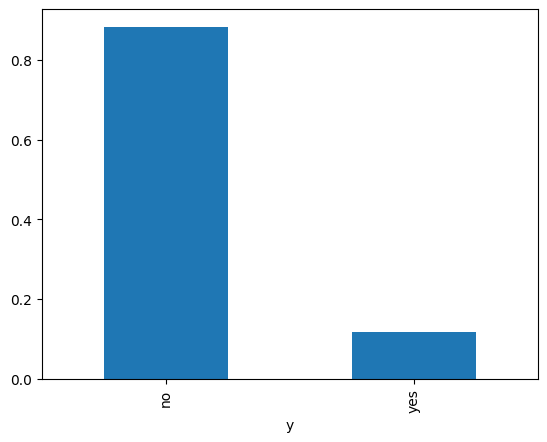

In [42]:
print(df['y'].value_counts())
print(df['y'].value_counts(normalize=True))
print(df['y'].value_counts(normalize=True).plot(kind='bar'))

Como vemos, es mucha mayor la proporcion de "no"´s que de "si"´s en la variable Y(nada util pero nos da una idea de la dificultad). Para empezar a hacer nuestro análisis descriptivo, vamos a realizar visualizaciones 

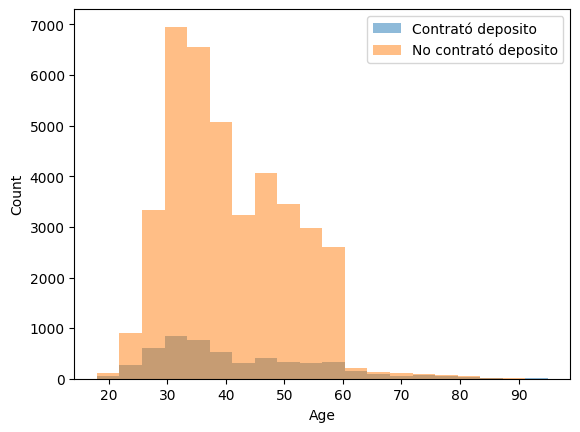

In [43]:
#Primero voy a querer ver una visualización básica de la edad de los clientes del banco, y si hay mas jovenes o adultos que contraten el servicio de plazo fijo.
plt.hist(df[df['y'] == 'yes']['age'], bins=20, alpha=0.5, label='Contrató deposito')
plt.hist(df[df['y'] == 'no']['age'], bins=20, alpha=0.5, label='No contrató deposito')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

Como vemos, la mayoria de gente que sí que contrató el depósito está en los 30 y pico, información util para dirigir próximas de marketing tal vez.

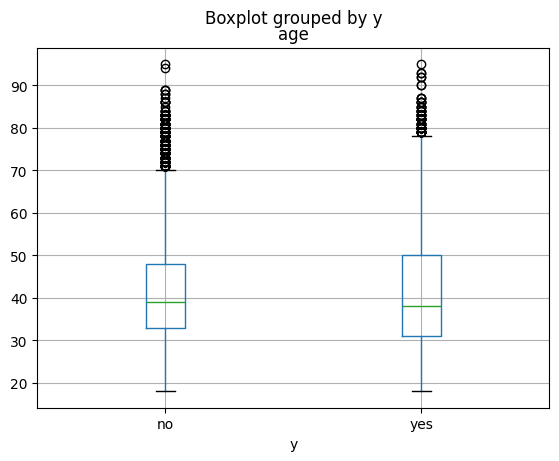

In [44]:
df.boxplot(column='age', by='y')
plt.show()

Con otra manera de visualizarlo, vemos las medias de las edades de los clientes que si y que no contrataron el depósito

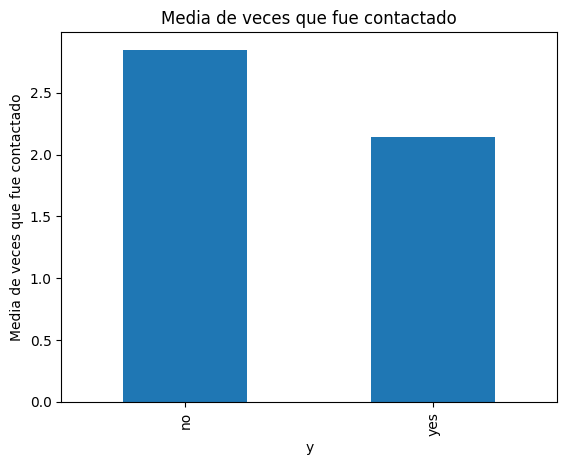

In [45]:
df.groupby('y')['campaign'].mean().plot(kind='bar')
plt.xlabel('y')
plt.ylabel('Media de veces que fue contactado')
plt.title('Media de veces que fue contactado')
plt.show()


Buscando si el número de veces contactado al cliente tiene correlación con su decisión final de contratar o no el depósito, vemos que la media de la gente que contrató el depósito es inferior a la que no, por lo que no solo no tiene relacion directa, si no que podría ser inversa.


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.49      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.70      9043
weighted avg       0.87      0.87      0.87      9043



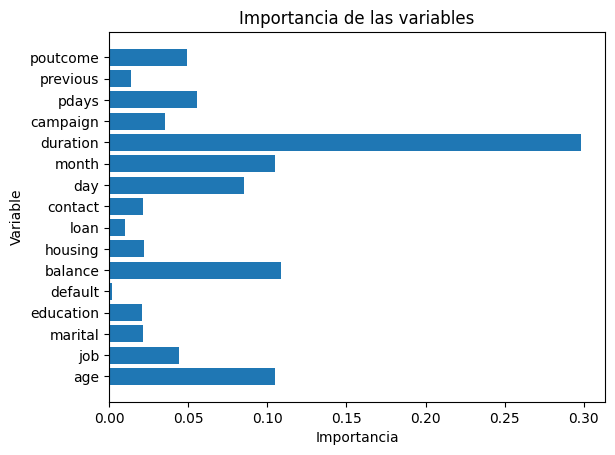

In [72]:

df = pd.read_csv('bank-full.csv', delimiter=';')
le = LabelEncoder()
for column in df.select_dtypes(include='object').columns:

    df[column] = le.fit_transform(df[column])

#dividir en x e y     
X = df.drop('y', axis=1)
y = df['y']

#train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#entrenar el modelo
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train.ravel())

#predicciones
y_pred = modelo.predict(X_test)

#evaluamos modelo
print(classification_report(y_test, y_pred))

#Una vez que tenemos el modelo, vamos a ver cual de las variables es la mas importante para el modelo, y cual es la menos importante. Para esto, vamos a usar el atributo feature_importances_ del modelo, y lo vamos a visualizar en un gráfico de barras.
plt.barh(X.columns, modelo.feature_importances_)
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las variables')
plt.show()


Despues de realizar un modelo de clasificación de la variable Y, damos uso de "feature_importances para ver qué variables tienen mas o menos peso.Esto significa que la variable con mas importancia es la variable duration, y la variable con menos importancia es la variable default. Como duration es una variable que 


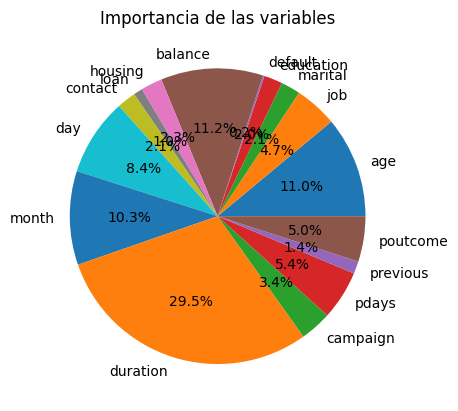

In [68]:
plt.pie(modelo.feature_importances_, labels=X.columns, autopct='%1.1f%%')
plt.title('Importancia de las variables')
plt.show()

Una distinta manera de ver la proporción de importancia de las variables. Por curiosidad, como vemos que la segunda variable más 
determinante es el balance medio anual en euros, hacemos un scatterplot


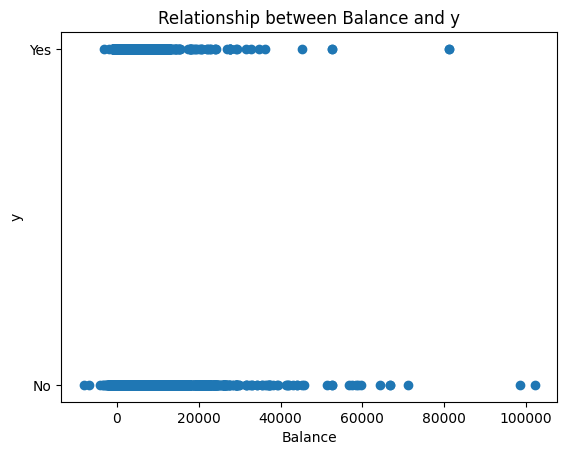

In [69]:
plt.scatter(df['balance'], df['y'])
plt.xlabel('Balance')
plt.ylabel('y')
plt.title('Relationship between Balance and y')
plt.yticks([0, 1], ['No', 'Yes'])
plt.show()

In [73]:
#en cajas dividemelo en y=si e y=no


#cajas
fig_boxplot = go.Figure()
fig_boxplot.add_trace(go.Box(y=df['age'],x=y, name='Age'))
fig_boxplot.update_layout(title='Cajas de Edad')

#importancia
fig_importance = go.Figure(data=[go.Bar(x=X.columns, y=modelo.feature_importances_)])
fig_importance.update_layout(title='Importancia de las variables')

#distribucion
fig_age_dist = px.histogram(df, x='age', nbins=20, color='y')
fig_age_dist.update_layout(title='Distribución de Edad')

#scatter último
fig_balance_scatter = px.scatter(df, x='balance', y='y', color='y')
fig_balance_scatter.update_layout(title='Relación entre Balance y y')

#agrupamos en un dashboard y lo enseñamos
dashboard = widgets.VBox([
    widgets.HBox([widgets.VBox([go.FigureWidget(fig_boxplot)]), widgets.VBox([go.FigureWidget(fig_importance)])]),
    widgets.HBox([widgets.VBox([go.FigureWidget(fig_age_dist)]), widgets.VBox([go.FigureWidget(fig_balance_scatter)])])
])
dashboard






    'data': [{'name': 'Age',
              'type':…

Basandonos en el análisis planteado, podemos sacar algunas conclusiones: Las variables mas importantes a la hora de capturar clientes serán la duración del ultimo contacto con el cliente, la media del balance anual en euros y la edad del cliente. Estas podrían ser las variables a pulir para acotar el público y perseguir un cliente que sea más probable que contrate el depósito. Viendo el scatterplot del balance, podemos observar que clientes con un balance alto son los mas susceptibles a contratar el depósito. 

# *

# *

# *

Dropdown(description='Select Variable:', options=('duration', 'balance', 'age', 'campaign', 'pdays'), value='d…

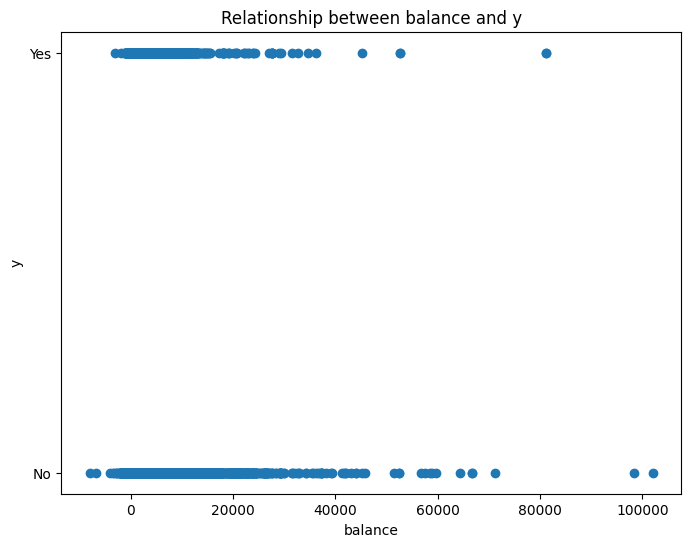

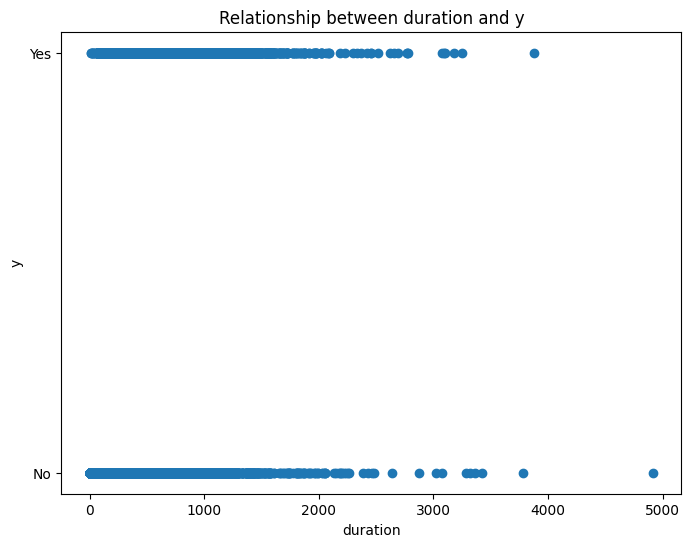

In [82]:
# Ddropdown sencillo para ver un graph scatter con respeto a y
dropdown = widgets.Dropdown(options=top_variables, description='Selecciona variable:')
def dropdown_event_handler(change):
    variable = change.new
    plt.figure(figsize=(8, 6))
    plt.scatter(df[variable], df['y'])
    plt.xlabel(variable)
    plt.ylabel('y')
    plt.title(f'relacion enre {variable} e y')
    plt.yticks([0, 1], ['No', 'Yes'])
    plt.show()
dropdown.observe(dropdown_event_handler, names='value')
dropdown



